<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#An-early-Harrod-Domar-('39,-'46)-endogenous-growth-model" data-toc-modified-id="An-early-Harrod-Domar-('39,-'46)-endogenous-growth-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An early Harrod-Domar ('39, '46) endogenous growth model</a></span></li><li><span><a href="#Computation-and-visualization-exercise" data-toc-modified-id="Computation-and-visualization-exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Computation and visualization exercise</a></span></li><li><span><a href="#Lucas-'88-meets-Glomm-Ravikumar-'92" data-toc-modified-id="Lucas-'88-meets-Glomm-Ravikumar-'92-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lucas '88 meets Glomm-Ravikumar '92</a></span></li><li><span><a href="#Computation-and-visualization-exercise" data-toc-modified-id="Computation-and-visualization-exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computation and visualization exercise</a></span></li></ul></div>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# An early Harrod-Domar ('39, '46) endogenous growth model

Consider the textbook Solow-Swan growth model (see T01) with Cobb-Douglas production function and a capital income share of total production measured as $0< \alpha \leq 1$. Population grows at a constant rate of $n > -1$. Total factor productivity is constant at $Z > 0$ and consumers' common marginal propensity to save out of current income is $s \in (0,1)$.

Under what parameter restriction(s) would there be

1. perpetual growth?

2. No growth? 

Provide plain-English, economic explanations of your insights.

**Solution**.

Let $X_{t} :=: X$ and $X_{t+1} :=: X'$.

We'll write this for the general case where $Z'/Z = 1+g$ and $N'/N = (1+n)$.

The model equilibrium is given as:
\begin{equation*}
    \begin{split}
    Y = K^{\alpha}(ZN)^{1-\alpha},
    \\
    K' = (1-\delta)K + sY.
    \end{split}
\end{equation*}
These two equations, respectively, are the production function and the national accounting identity. The national accounting identity has incorporated our neoclassical capital production/accumulation equation.

Rewrite in per-efficient-worker terms, e.g., $k = K/(ZN)$, we have:
\begin{equation*}
k' = \frac{(1-\delta)k + sk^{\alpha}}{(1+n)(1+g)}.
\end{equation*}

If $\alpha=1$, then 
\begin{equation*}
    k' = Ak,
\end{equation*}
where 
\begin{equation*}
    A = \frac{1-\delta + s}{(1+n)(1+g)}.
\end{equation*}

So this is of a form akin to the early Harrod-Domar "AK" model. This is just a linear homogenous difference equation in $k$.

Observation:

1. $A > 1 \iff s > (1+n)(1+g) - (1-\delta)$ gives perpetual growth since $k'/k > 1$. 

    * The point $k=0$ is an unstable steady state equilibrium.

2. $A < 1 \iff s < (1+n)(1+g) - (1-\delta)$ renders no perpetual growth since $k'/k < 1$. 

    * The point $k=0$ is an globlly stable steady state equilibrium.

3. $A = 1 \iff s = (1+n)(1+g) - (1-\delta)$ implies no perpetual growth since $k'/k = 1$. 

    * Every point in $\mathbb{R}_{+}$ is a stable steady state.

# Computation and visualization exercise

Now try to demonstrate your analytical insights.

In [28]:
# Set parameters
α = 1.0
δ = 0.10
n = 0.001
g = 0.0    

Here I'll set $g=0$ so there is no source of exogenous growth in per capita income.

Then, any possible growth in the long run will only come from the feature of the "endogenous" $A$ term.

In [29]:
# Composite parameter on RHS of our sufficient condition
test_rhs = (1.0+n)*(1.0+g)-(1.0-δ)

In [30]:
print(test_rhs)

0.10099999999999987


In [31]:
s = 0.15

One way to neatly pack away many input (here, parameters) is to use a ``DICT``:

In [32]:
parameters = {
                'capital share'     : α,
                'depreciation rate' : δ,
                'pop growth rate'   : n,
                'tech growth rate'  : g,
                'saving rate'       : s,
             }

Now we define the equilibrium map in terms of variables detrended by exogenous growth factors, and also in terms of potentially growing variables:

In [33]:
def modelonuevo(k, Z, parameters):
    """Equilbrium map of growth model."""
 
    # Extract parameter values
    α = parameters['capital share']
    δ = parameters['depreciation rate']
    n = parameters['pop growth rate']
    g = parameters['tech growth rate']
    s = parameters['saving rate']
    # Per-efficiency units of worker terms
    k_next = ((1.0-δ)*k + s*k**α)/((1.0+n)*(1.0+g))
    y = k**α
    # Technology
    Z_next = (1.0+g)*Z
    # Per worker terms
    kw = k*Z
    yw = y*Z
    return k_next, y, kw, yw, Z_next

Write a little function to solve the model for its equilibrium trajectory:

In [36]:
def simulate(parameters, k0=0.5, Z0=1.0, T=50):
    """Solve recursion for T periods"""
    
    # Initial states
    k, Z = k0, Z0
    # data collection dictionary
    data = { 'k' : [], 'y' : [], 'kw': [], 'yw': [], 'Z': [] }
    for t in range(T):
        # Evaluate data generation process once
        k_next, y, kw, yw, Z_next = modelonuevo(k, Z, parameters)
        # Update data collection book
        data['k'].append(k)
        data['y'].append(y)
        data['kw'].append(kw)
        data['yw'].append(yw)
        data['Z'].append(Z)
        # Update states for next iteration t
        k, Z = k_next, Z_next
    return data

Here's a sample result, where we savings rate to be sufficiently large to induce perpetual growth:

In [43]:
out = simulate(parameters, k0=0.5, Z0=1.0, T=50)

Let's visualize the equilibrium path in a phase diagram:

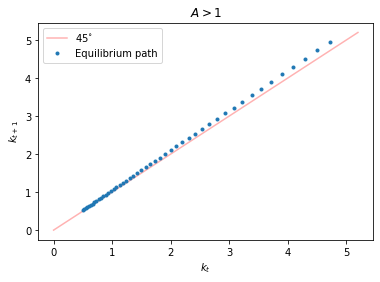

In [59]:
plt.figure()
# Render 45-degree line
kspace = np.linspace(0.0, max(out['k']), 100)
plt.plot(kspace, kspace, '-r', alpha=0.3, label=r'$45^{\circ}$')
# Plot the equilibrium trajectory in phase diagram
klag = out['k'][0:-2]
klead = out['k'][1:-1]
plt.plot(klag, klead, '.', label='Equilibrium path')
# Labels and whatnot
plt.legend()
plt.xlabel('$k_{t}$')
plt.ylabel('$k_{t+1}$')
plt.title('$A > 1$')
plt.show()

Or as a time path:

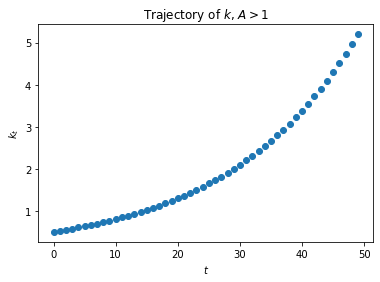

In [60]:
plt.figure()
plt.plot(np.arange(len(out['k'])), out['k'], 'o')
plt.xlabel('$t$')
plt.ylabel('$k_{t}$')
plt.title('Trajectory of $k$, $A > 1$')
plt.show()

**More workouts!**

Try extending your code above to consider different cases of $s$ such that $A > 0$, or $A\leq 0$.

In [61]:
# Consider 3 cases of s ...
experiment = {'saving rate': [0.5*test_rhs, test_rhs, 2.0*test_rhs]}

**Maccas time.** Let's package the plotting tasks we've previously hand-coded into a flippable, reusable function:

In [74]:
def showpath(out, s):
    plt.figure()
    # Render 45-degree line
    kspace = np.linspace(0.0, max(out['k']), 100)
    plt.plot(kspace, kspace, '-r', alpha=0.3, label=r'$45^{\circ}$')
    # Plot the equilibrium trajectory in phase diagram
    klag = out['k'][0:-2]
    klead = out['k'][1:-1]
    plt.plot(klag, klead, '.', label='Equilibrium path')
    # Labels and whatnot
    plt.legend()
    plt.xlabel('$k_{t}$')
    plt.ylabel('$k_{t+1}$')
    plt.title('$s$ = %5.2f' %(s))
    plt.show()
    
    plt.figure()
    plt.plot(np.arange(len(out['k'])), out['k'], 'o')
    plt.xlabel('$t$')
    plt.ylabel('$k_{t}$')
    plt.title('Trajectory of $k$, $s$ = %5.2f' %(s))
    plt.show()

Case 0: Now solving model indexed by s = 0.05


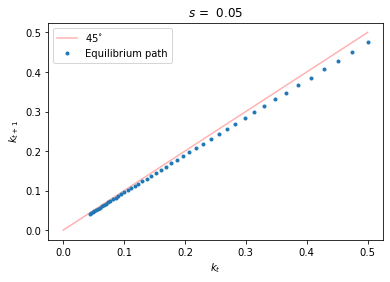

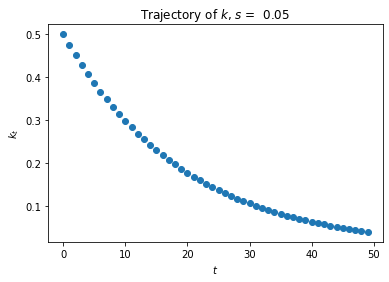

Case 1: Now solving model indexed by s = 0.10


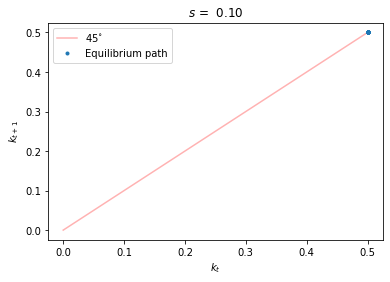

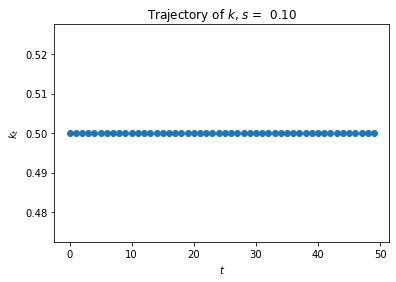

Case 2: Now solving model indexed by s = 0.20


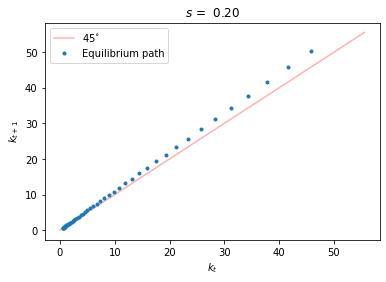

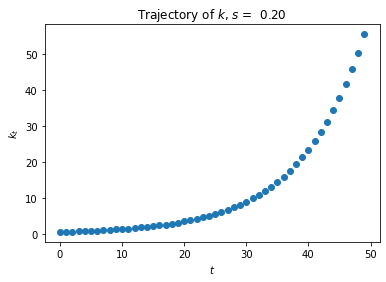

In [76]:
for idx_s, s in enumerate(experiment['saving rate']):
    print('Case %i: Now solving model indexed by s =%5.2f' %(idx_s, s))
    # Override previous value of s in DICT:
    parameters['saving rate'] = s
    # Solve new model indexed by s
    out = simulate(parameters, k0=0.5, Z0=1.0, T=50)
    # Display graphics
    showpath(out, s)

# Lucas '88 meets Glomm-Ravikumar '92

Do **Question F** from the 2019 Final Exam. You may either submit your work here in a Jupyter Notebook or as a separate, ``LaTeX`` typeset document in ``PDF``.

References:

* [Lucas (1988)](https://doi.org/10.1016/0304-3932(88)90168-7)

* [Glomm and Ravikumar (1992)](https://www.jstor.org/stable/2138689)

* [de la Croix and Michel (2002)](https://ebookcentral.proquest.com/lib/anu/detail.action?docID=202147)



# Computation and visualization exercise

Revisit your work in the last part and code up the two cases of dynamic equilibria (under privately-funded and publicly funded human-capital investment).